In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.stats.mediation import Mediation
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
import imgkit





Qpilot = pd.read_excel('/Users/user/Clean_datant.xlsx')




# Intellectual Curiosity and Informality

I ran again PCAs on new data.



How often have you engaged with the following sources of information within the last 12 months?

- Literature - "Literature"
- Non_fiction - "Non_fiction"
- Magazines - "Magazines"
- Newspapers - "Newspapers"
- Podcasts - "Podcasts"
- Academic_papers - "Academic_papers"
- You_tube - "You_tube"
- Reddit - "Reddit"
- 4Chan - "4Chan"
- Twitter - "Twitter"
- Instagram - "Instagram"
- Facebook - "Facebook"
- Wikipedia - "Wikipedia"
- Quora - "Quora"
- Other_sources - "Other_sources"


Imagine you've just stumbled across an article or video about a new scientific discovery or a breakthrough in technology. What are you most likely to do in the next 24 hours?

- Share it on social media - "Discovery_share"
- Look for more in-depth information or articles on the same topic - "Discovery_depth"
- Save or bookmark it for later reading/viewing - "Discovery_save"
- Seek out a friend or family member who might be interested in the topic and discuss it with them - "Discovery_discuss"
- Start a conversation about it in an online forum or community you're a part of - "Discovery_forum"
- Check it on Wikipedia - "Discovery_Wikipedia"



How often have you engaged in the following activities related to scientific information within the last 12 months?

- Reading science-related news articles (both online and offline) - "Sci_info_news"
- Watching videos about scientific topics (on YouTube or other similar platforms) - "Sci_info_videos"
- Listening to science-related podcasts - "Sci_info_podcasts"
- Reading science-related accessible books - "Sci_info_popbooks"
- Participating in online or offline science discussions or forums - "Sci_info_forums"
- Reading articles from peer-reviewed journals - "Sci_info_journals"
- Reading scientific textbooks and scholarly material (e.g., programming, engineering, medicine, economics textbooks, etc.) - "Sci_info_textbooks"
- Reading pages on Wikipedia - "Sci_info_Wikipedia"



Please indicate your level of agreement with the following sentences:

- A good podcast or documentary is all one needs to understand a scientific concept - 'Pop_attitude_podcast'
- The reputation or credibility of an information source matters. It is not just about whether the content makes sense to me - 'Formal_attitude_reputation'
- Despite the widespread availability of online resources, formal scientific education remains essential - 'Formal_attitude_edu'
- The rigid conventions of scientific journals limit advancements, making independent creators and thinkers a more innovative and clear source of information - 'Pop_attitude_journalsrigid'
- Forums and videos on online platforms bring out new important scientific ideas every day despite scientific journals not publishing them - 'Pop_attitude_journalsvsideas'
- I tend to trust information from established institutions more than independent creators - 'Formal_attitude_institutions'




Component Matrix (Loadings):

      Literature  Non_fiction  Newspapers  Podcasts  Academic_papers  \
PC-1    0.136388     0.135163    0.104602  0.160592          0.21343   
PC-2    0.238683     0.276755   -0.019186  0.144181          0.20737   

      Discovery_share  Discovery_depth  Discovery_save  Discovery_discuss  \
PC-1         0.207030         0.241536        0.236602           0.195246   
PC-2         0.107153        -0.176161       -0.119750          -0.069771   

      Discovery_forum  ...  Sci_info_forums  Sci_info_journals  \
PC-1         0.221451  ...         0.246568           0.277601   
PC-2         0.210892  ...         0.216504           0.055450   

      Sci_info_textbooks  Sci_info_Wikipedia  Pop_attitude_podcast  \
PC-1            0.281315            0.181825              0.124587   
PC-2            0.045282           -0.231569              0.005636   

      Pop_attitude_journalsrigid  Pop_attitude_journalsvsideas  \
PC-1                    0.110881             

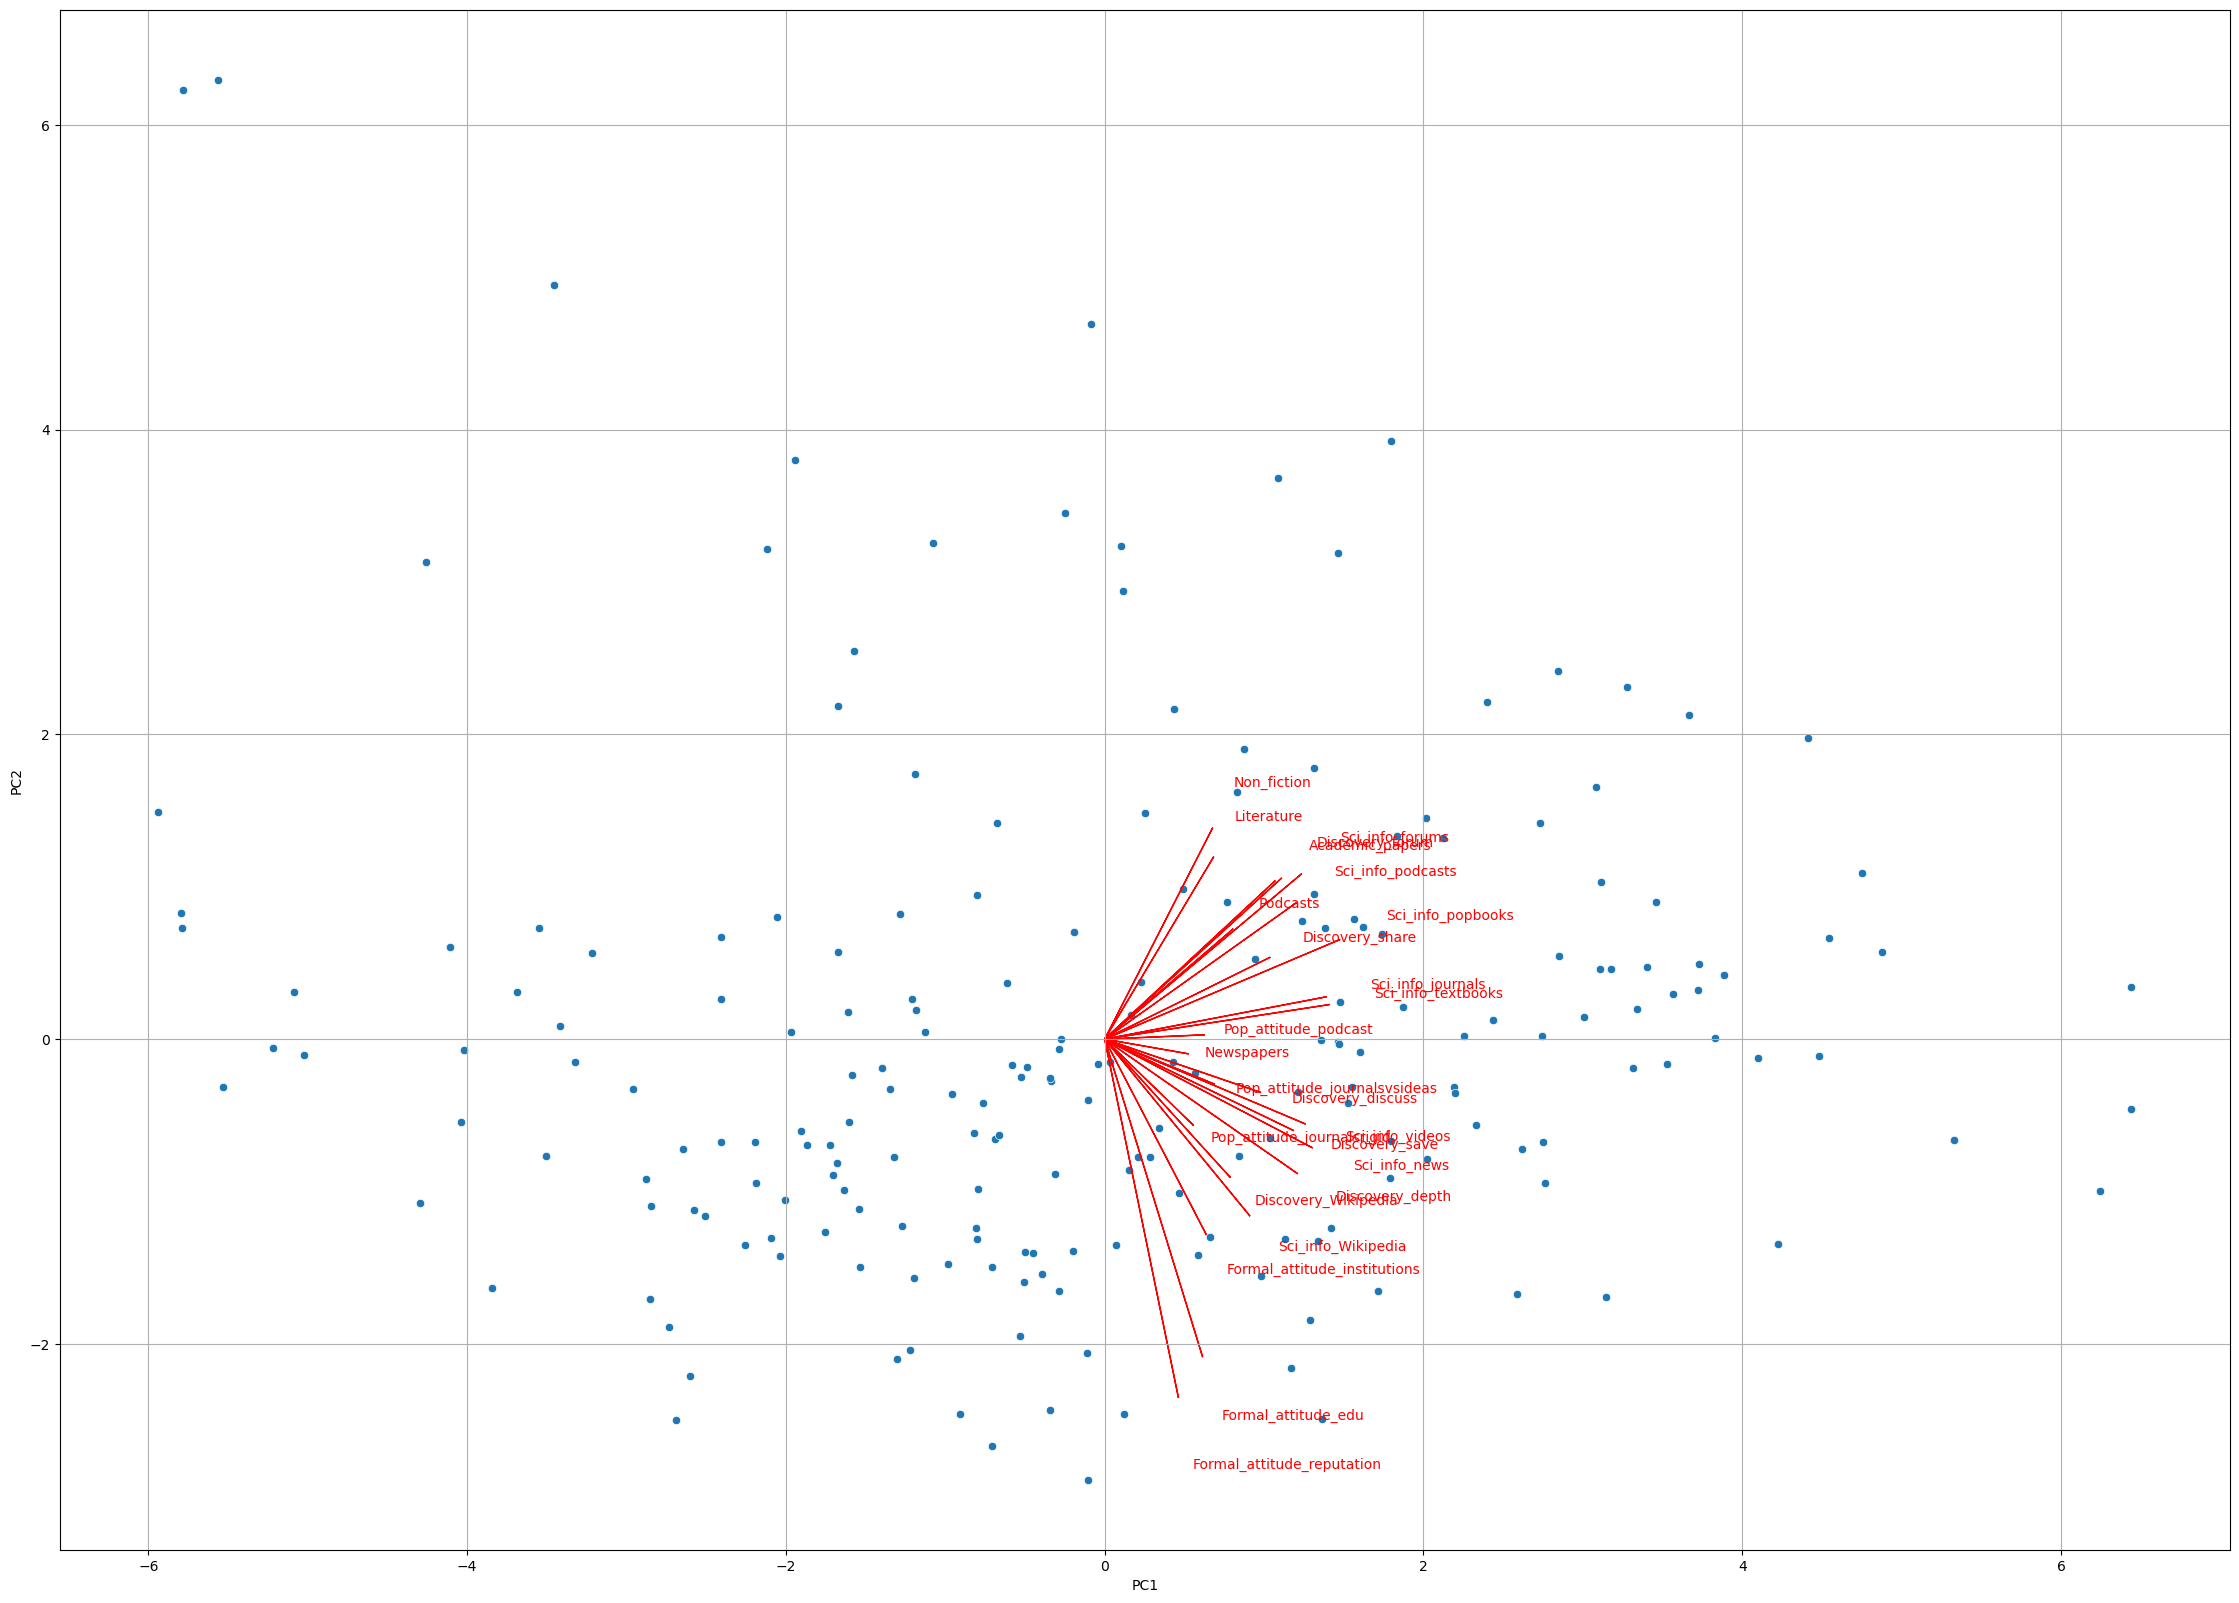

In [2]:

Formal_sub = Qpilot[["Literature", "Non_fiction", "Newspapers", "Podcasts", 
                "Academic_papers", 
                  
                  "Discovery_share", "Discovery_depth", 
                  "Discovery_save", "Discovery_discuss", "Discovery_forum", 
                  "Discovery_Wikipedia",
                  
                  
                  "Sci_info_news", "Sci_info_videos", 
                 "Sci_info_podcasts", "Sci_info_popbooks", "Sci_info_forums", 
                 "Sci_info_journals", "Sci_info_textbooks", "Sci_info_Wikipedia",
                  
                  
                  
                  'Pop_attitude_podcast', 'Pop_attitude_journalsrigid', 'Pop_attitude_journalsvsideas',
                  'Formal_attitude_reputation','Formal_attitude_edu','Formal_attitude_institutions']]

scaler = StandardScaler()
Formal_scaled = scaler.fit_transform(Formal_sub)

n_components = 2

pca = PCA(n_components=n_components)
pca.fit(Formal_scaled)

print("Component Matrix (Loadings):\n")
loadings = pd.DataFrame(pca.components_,columns=Formal_sub.columns,index = ['PC-'+str(i) for i in range(1,n_components+1)])
print(loadings)

explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")

transformed_Formal = pca.transform(Formal_scaled)





Formal_pca = pca.transform(Formal_scaled)
Formal_pca_df = pd.DataFrame(Formal_pca, columns=[f'PC{i+1}' for i in range(Formal_pca.shape[1])])

scale_factor = 5

plt.figure(figsize=(28, 20))
sns.scatterplot(x='PC1', y='PC2', data=Formal_pca_df)

for i, variable in enumerate(Formal_sub.columns):
    plt.arrow(0, 0, pca.components_[0, i]*scale_factor, pca.components_[1, i]*scale_factor, color='r')
    plt.text(pca.components_[0, i]*scale_factor*1.2, pca.components_[1, i]*scale_factor*1.2, variable, color='r')


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()




As you can see the there are few outliers that are maiking us loosing interpretability of the PC2. I try to remove them and re-run the PCA. 


Component Matrix (Loadings):

      Literature  Non_fiction  Newspapers  Podcasts  Academic_papers  \
PC-1    0.178162     0.178866    0.121462  0.181553         0.240973   
PC-2   -0.079446    -0.007337   -0.188101  0.119170         0.005549   

      Discovery_share  Discovery_depth  Discovery_save  Discovery_discuss  \
PC-1          0.20509         0.233114        0.230848           0.184063   
PC-2          0.22262        -0.159117       -0.063997           0.041119   

      Discovery_forum  ...  Sci_info_forums  Sci_info_journals  \
PC-1         0.223768  ...         0.250591           0.279518   
PC-2         0.295975  ...         0.216698          -0.054590   

      Sci_info_textbooks  Sci_info_Wikipedia  Pop_attitude_podcast  \
PC-1            0.281016            0.169802               0.11054   
PC-2           -0.026840           -0.265562               0.24084   

      Pop_attitude_journalsrigid  Pop_attitude_journalsvsideas  \
PC-1                    0.086729             

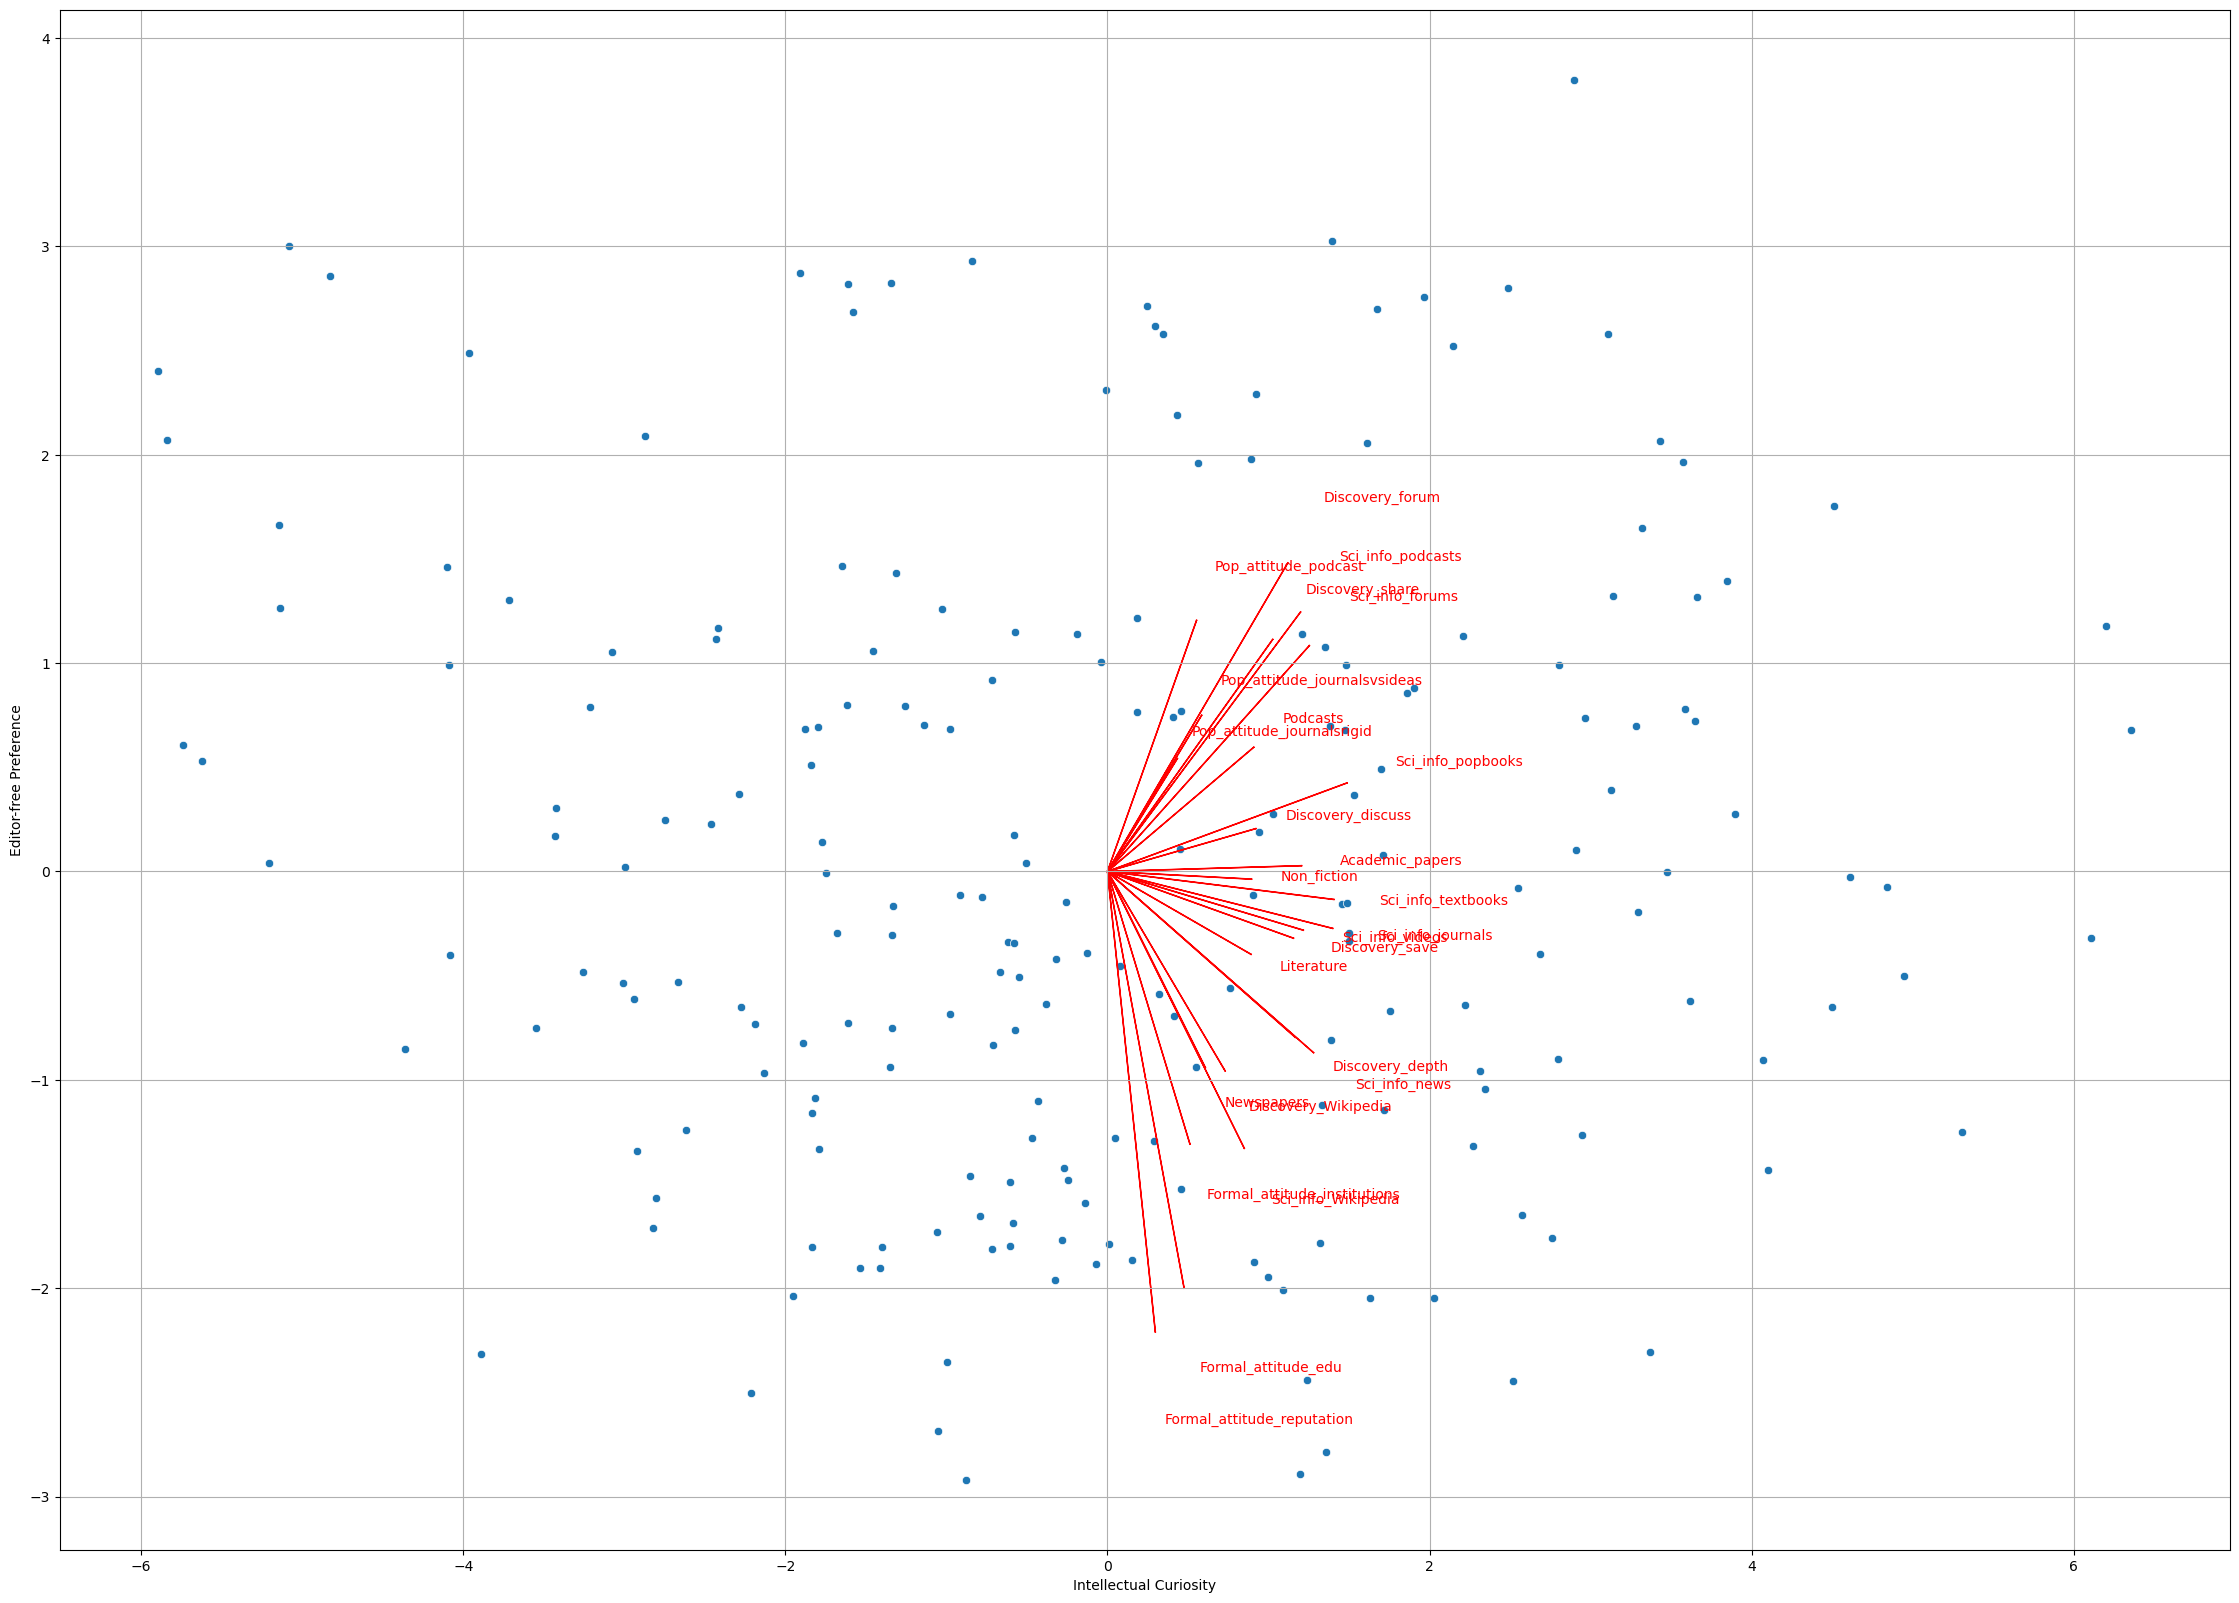

In [3]:

Formal_pca_df_cleaned = Formal_pca_df[(Formal_pca_df['PC2'] >= -4) & (Formal_pca_df['PC2'] <= 4)]


indices_to_keep = Formal_pca_df_cleaned.index
Formal_sub_cleaned = Formal_sub.loc[indices_to_keep]

scaler = StandardScaler()
Formal_scaled_cleaned = scaler.fit_transform(Formal_sub_cleaned)


pca = PCA(n_components=n_components)
pca.fit(Formal_scaled_cleaned)



print("Component Matrix (Loadings):\n")
loadings = pd.DataFrame(pca.components_,columns=Formal_sub.columns,index = ['PC-'+str(i) for i in range(1,n_components+1)])
print(loadings)

explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")

transformed_Formal = pca.transform(Formal_scaled)


SCORES = pd.DataFrame(transformed_Formal, columns=[f'Formal_PC{i+1}' for i in range(n_components)])

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


Formal_pca = pca.transform(Formal_scaled)
Formal_pca_df = pd.DataFrame(Formal_pca, columns=[f'PC{i+1}' for i in range(Formal_pca.shape[1])])

scale_factor = 5

plt.figure(figsize=(28, 20))
sns.scatterplot(x='PC1', y='PC2', data=Formal_pca_df)

for i, variable in enumerate(Formal_sub.columns):
    plt.arrow(0, 0, pca.components_[0, i]*scale_factor, pca.components_[1, i]*scale_factor, color='r')
    plt.text(pca.components_[0, i]*scale_factor*1.2, pca.components_[1, i]*scale_factor*1.2, variable, color='r')


plt.xlabel('Intellectual Curiosity')
plt.ylabel('Editor-free Preference')
plt.grid()
plt.show()




By removing the respondent who scored more than 4 positive on PC2 we managed to clearly see the directions we saw in the pilot. Thus, PC1 seems to represent a general engagement with intellectual activities (INTELLECTUAL CURIOSITY), while PC2 seems to measure effectively the preference towards non-edited sources of information and the informal attitude toward scientifc knowledge.

# Genius Mentality

Component Matrix (Loadings):

      Genius_Einstein  Genius_intelligence  Genius_cultivating  \
PC-1        -0.277081            -0.412430           -0.305068   
PC-2        -0.269580            -0.189936           -0.382855   

      Genius_eventoday  Genius_outsiders  Collective_collaboration  \
PC-1         -0.319960         -0.191221                 -0.288158   
PC-2         -0.380522         -0.397036                  0.228661   

      Collective_herdwisd  Collective_internetedu  Collective_trialanderror  \
PC-1            -0.368223               -0.322647                 -0.326724   
PC-2             0.358611                0.174959                  0.321943   

      Collective_resultcollective  
PC-1                    -0.302734  
PC-2                     0.356501  

Explained Variance for each component:
PC1: 30.32%
PC2: 16.95%


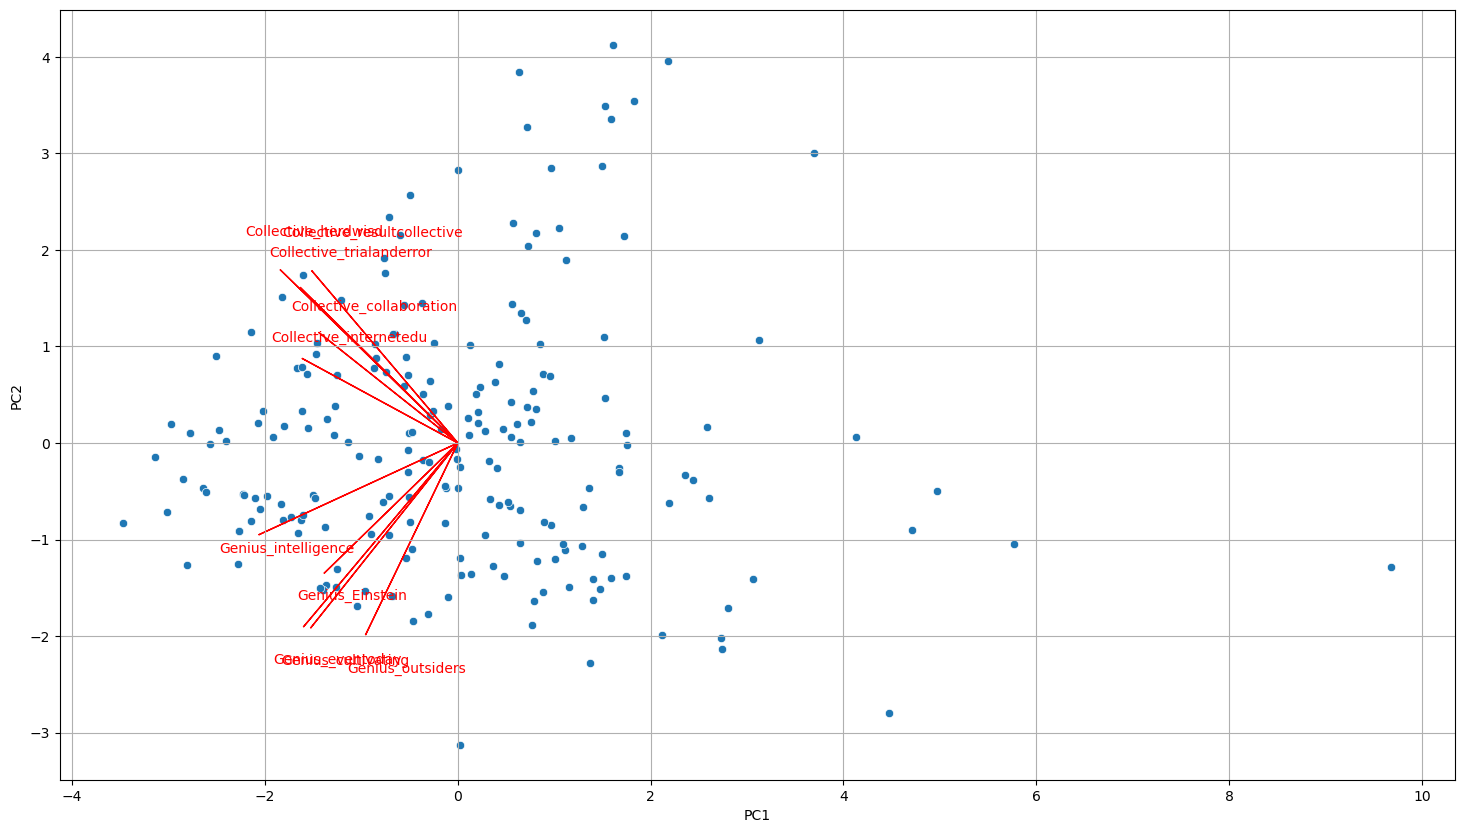

In [4]:


Genius_sub = Qpilot[["Genius_Einstein", "Genius_intelligence","Genius_cultivating",
               "Genius_eventoday","Genius_outsiders","Collective_collaboration",
               "Collective_herdwisd","Collective_internetedu","Collective_trialanderror",
               "Collective_resultcollective"]]

scaler = StandardScaler()
Genius_scaled = scaler.fit_transform(Genius_sub)

n_components = 2

pca = PCA(n_components=n_components)
pca.fit(Genius_scaled)

print("Component Matrix (Loadings):\n")
loadings = pd.DataFrame(pca.components_,columns=Genius_sub.columns,index = ['PC-'+str(i) for i in range(1,n_components+1)])
print(loadings)

explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")

transformed_Genius = pca.transform(Genius_scaled)



Genius_pca_df = pd.DataFrame(transformed_Genius, columns=[f'PC{i+1}' for i in range(transformed_Genius.shape[1])])

scale_factor = 5

plt.figure(figsize=(18, 10))
sns.scatterplot(x='PC1', y='PC2', data=Genius_pca_df)

for i, variable in enumerate(Genius_sub.columns):
    plt.arrow(0, 0, pca.components_[0, i]*scale_factor, pca.components_[1, i]*scale_factor, color='r')
    plt.text(pca.components_[0, i]*scale_factor*1.2, pca.components_[1, i]*scale_factor*1.2, variable, color='r')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


As we can see the questions still form two distinct groups, but the meaning of the two PCs is not clear as it was in the pilot. I try to remove the outliers (PC1 > 3) and see if we have some improvement. 

Component Matrix (Loadings):

      Genius_Einstein  Genius_intelligence  Genius_cultivating  \
PC-1         0.263572             0.418463            0.387673   
PC-2        -0.202948            -0.191494           -0.317530   

      Genius_eventoday  Genius_outsiders  Collective_collaboration  \
PC-1          0.407572          0.294660                  0.173487   
PC-2         -0.298168         -0.276992                  0.333519   

      Collective_herdwisd  Collective_internetedu  Collective_trialanderror  \
PC-1             0.267289                0.305037                  0.284479   
PC-2             0.433365                0.212548                  0.382094   

      Collective_resultcollective  
PC-1                     0.276897  
PC-2                     0.406787  

Explained Variance for each component:
PC1: 22.88%
PC2: 18.40%


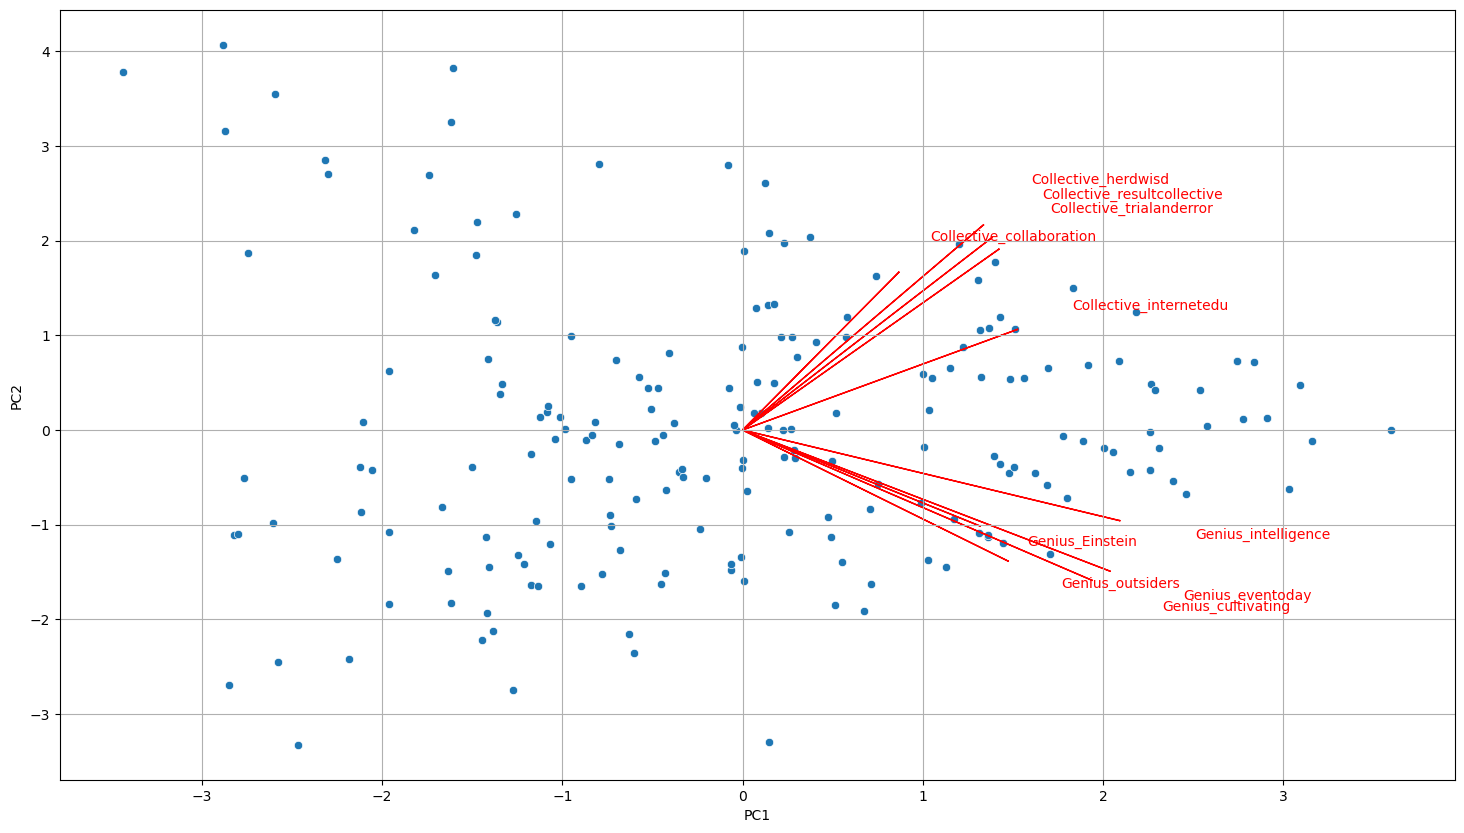

In [5]:
outliers = Genius_pca_df[Genius_pca_df['PC1'] > 3].index


Genius_sub_cleaned = Genius_sub.drop(outliers, axis=0)


Genius_scaled_cleaned = scaler.fit_transform(Genius_sub_cleaned)
pca = PCA(n_components=2)
pca.fit(Genius_scaled_cleaned)


print("Component Matrix (Loadings):\n")
loadings = pd.DataFrame(pca.components_,columns=Genius_sub_cleaned.columns,index = ['PC-'+str(i) for i in range(1,n_components+1)])
print(loadings)

explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")

transformed_Genius_cleaned = pca.transform(Genius_scaled_cleaned)
df_Genius_cleaned = pd.DataFrame(transformed_Genius, columns=[f'Genius_PC{i+1}' for i in range(n_components)])

SCORES = pd.concat([SCORES, df_Genius_cleaned], axis=1)


Genius_pca_df_cleaned = pd.DataFrame(transformed_Genius_cleaned, columns=[f'PC{i+1}' for i in range(transformed_Genius_cleaned.shape[1])])

scale_factor = 5

plt.figure(figsize=(18, 10))
sns.scatterplot(x='PC1', y='PC2', data=Genius_pca_df_cleaned)

for i, variable in enumerate(Genius_sub_cleaned.columns):
    plt.arrow(0, 0, pca.components_[0, i]*scale_factor, pca.components_[1, i]*scale_factor, color='r')
    plt.text(pca.components_[0, i]*scale_factor*1.2, pca.components_[1, i]*scale_factor*1.2, variable, color='r')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

This second PCA without outliers resulted in two clear dimension. However, while PC2 correspond clearly to our target (Genius vs Collective) I find hard to attribute a meaning to PC1, if not a tendency in giving more positive or more negative responses in general.

# Conspiracy Beliefs

Conspiracy dimension is cristal clear.

Component Matrix (Loadings):

      Conspiracies_Cm3  Conspiracies_Cm4  Conspiracies_Cm5  Conspiracies_news  \
PC-1          0.249624          0.330385          0.341438           0.265175   

      Conspiracies_pharma  Conspiracies_mindcontrol  Conspiracies_Genius  \
PC-1             0.336087                  0.336766             0.293641   

      Conspiracies_clones  Conspiracies_vaccines  Conspiracies_suppresstech  \
PC-1             0.271625               0.309921                   0.258152   

      Conspiracies_UFO  
PC-1          0.304257  

Explained Variance for each component:
PC1: 49.08%


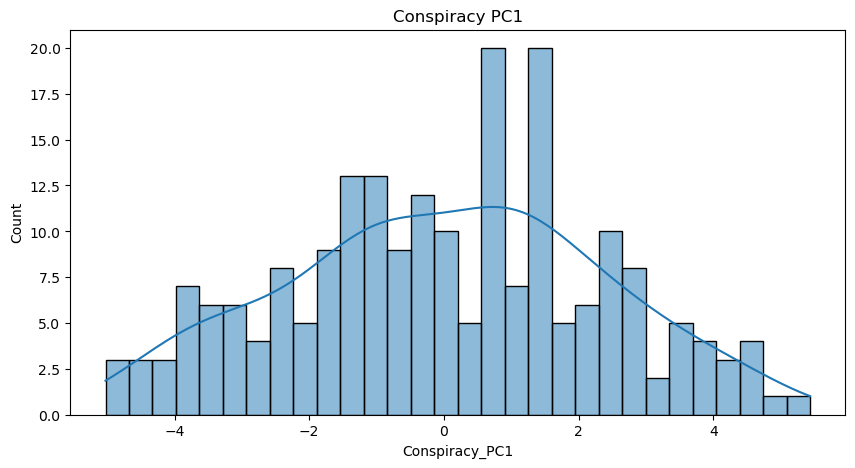

In [6]:

Conspiracy_sub = Qpilot[["Conspiracies_Cm3","Conspiracies_Cm4",
                   "Conspiracies_Cm5","Conspiracies_news","Conspiracies_pharma","Conspiracies_mindcontrol",
                    "Conspiracies_Genius", "Conspiracies_clones","Conspiracies_vaccines",
                   "Conspiracies_suppresstech","Conspiracies_UFO"]]

scaler = StandardScaler()
Conspiracy_scaled = scaler.fit_transform(Conspiracy_sub)

n_components = 1

pca = PCA(n_components=n_components)
pca.fit(Conspiracy_scaled)

print("Component Matrix (Loadings):\n")
loadings = pd.DataFrame(pca.components_,columns=Conspiracy_sub.columns,index = ['PC-'+str(i) for i in range(1,n_components+1)])
print(loadings)

explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")

transformed_Conspiracy = pca.transform(Conspiracy_scaled)


df_Conspiracy = pd.DataFrame(transformed_Conspiracy, columns=[f'Conspiracy_PC{i+1}' for i in range(n_components)])


SCORES = pd.concat([SCORES, df_Conspiracy], axis=1)


plt.figure(figsize=(10, 5))
sns.histplot(df_Conspiracy['Conspiracy_PC1'], bins=30, kde=True)
plt.title('Conspiracy PC1')
plt.show()



# Trust in Science

In the questionnaire, the part relative to trust in science was probalily the weakest one. As you made me notice, if we consider belief on the political role of science and the awereness of problems in academica and science communication, it's very easy to come out with many different profiles. Our questionnaire was not complex enough to explore this different styles seriously. Thus I opted for further simplifying the dimension. 


The complete set of questions was: 

- Scientists should be more involved in the public political debate (REMOVED)

- The scientific method generally produces accurate conclusions

- Technocracy, or the rule of society by technical experts, would be a more effective form of governance than the current political system (REMOVED)

- Scientific and technological advancements may lead to a 'Big Brother' surveillance state in the next few years (REMOVED, it is also a conspiracy)

- Scientific discoveries are often suppressed or manipulated to serve the interests of powerful elites

- Scientists and technicians thoroughly consider the risks of new technologies before they are used

- Before scientific findings are announced, other scientists have checked them (REMOVED)

- It's normal for scientists to disagree (REMOVED)

- In general, scientists want to make life better for the average person

- Scientists are trying new things without stopping to think about the consequences




Now TRUST IN SCIENCE is the result of 5 questions:

- The scientific method generally produces accurate conclusions

- Scientific discoveries are often suppressed or manipulated to serve the interests of powerful elites

- Scientists and technicians thoroughly consider the risks of new technologies before they are used

- In general, scientists want to make life better for the average person

- Scientists are trying new things without stopping to think about the consequences



(When I say 'Removed' I mean removed from the analysis, not from the questionnaire)

With this five questions the PCA showed a clear one dimension.





Component Matrix (Loadings):

      Trust_method  disTrust_suppression  Trust_riskmanage  Trust_betterlife  \
PC-1     -0.541831              0.367763         -0.303089         -0.545682   

      disTrust_consequences  
PC-1               0.426072  

Explained Variance for each component:
PC1: 32.14%


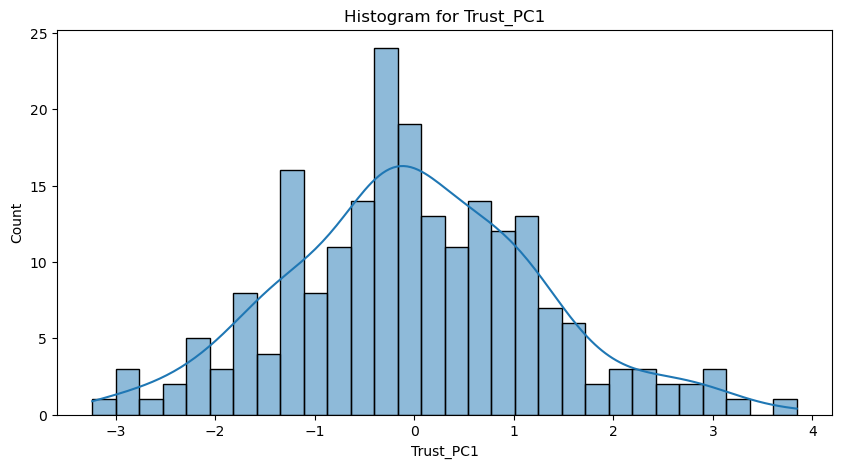

In [7]:
Trust_sub = Qpilot[["Trust_method",
              "disTrust_suppression","Trust_riskmanage",
             "Trust_betterlife","disTrust_consequences"]]

scaler = StandardScaler()
Trust_scaled = scaler.fit_transform(Trust_sub)

n_components = 1

pca = PCA(n_components=n_components)
pca.fit(Trust_scaled)

print("Component Matrix (Loadings):\n")
loadings = pd.DataFrame(pca.components_,columns=Trust_sub.columns,index = ['PC-'+str(i) for i in range(1,n_components+1)])
print(loadings)

explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance for each component:")
for i, exp_var in enumerate(explained_variance):
    print(f"PC{i+1}: {exp_var*100:.2f}%")

transformed_Trust = pca.transform(Trust_scaled)


df_Trust = pd.DataFrame(transformed_Trust, columns=[f'Trust_PC{i+1}' for i in range(n_components)])


SCORES = pd.concat([SCORES, df_Trust], axis=1)


plt.figure(figsize=(10, 5))
sns.histplot(df_Trust['Trust_PC1'], bins=30, kde=True)
plt.title('Histogram for Trust_PC1')
plt.show()



# Analysis

I created a dataset with the scores obtained from the PCAs. In case of Genius mentality I used only PC2 and I inverted the scores in order to have a dimension where high positive scores means high levels of genius mentality while low scores high levels of collective mentality.


From the correlation matrix we see that conspiracy is positively correlated with genius mentality and negatively correlated with trust in science.

In [8]:
import pandas as pd


SCORES = SCORES.rename(columns={
    "Formal_PC1": "Intellectual Curiosity",
    "Formal_PC2": "Editor-Free Preference",
    "Genius_PC1": "Gen_vs_Coll_PC1",
    "Genius_PC2": "Genius Mentality",
    "Conspiracy_PC1": "Conspiracy Beliefs",
    "Trust_PC1": "Trust in Science",
})


SCORES['Genius Mentality'] = SCORES['Genius Mentality'] * -1
SCORES['Trust in Science'] = SCORES['Trust in Science'] * -1


SCORES['Politics'] = Qpilot['Politics']
SCORES['Education_Numerical'] = Qpilot['Education_Numerical']


SCORES = SCORES[
    (SCORES['Genius Mentality'].between(-3, 3)) & 
    (SCORES['Editor-Free Preference'].between(-3, 3))
]


Final_Clean_Data = SCORES


Final_Clean_Data.to_excel('Final_Clean_Dat.xlsx', index=False, engine='openpyxl')






Index(['Education', 'Political Views', 'Intellectual Curiosity',
       'Editor-Free Preference', 'Trust in Science', 'Genius Mentality',
       'Conspiracy Beliefs'],
      dtype='object')


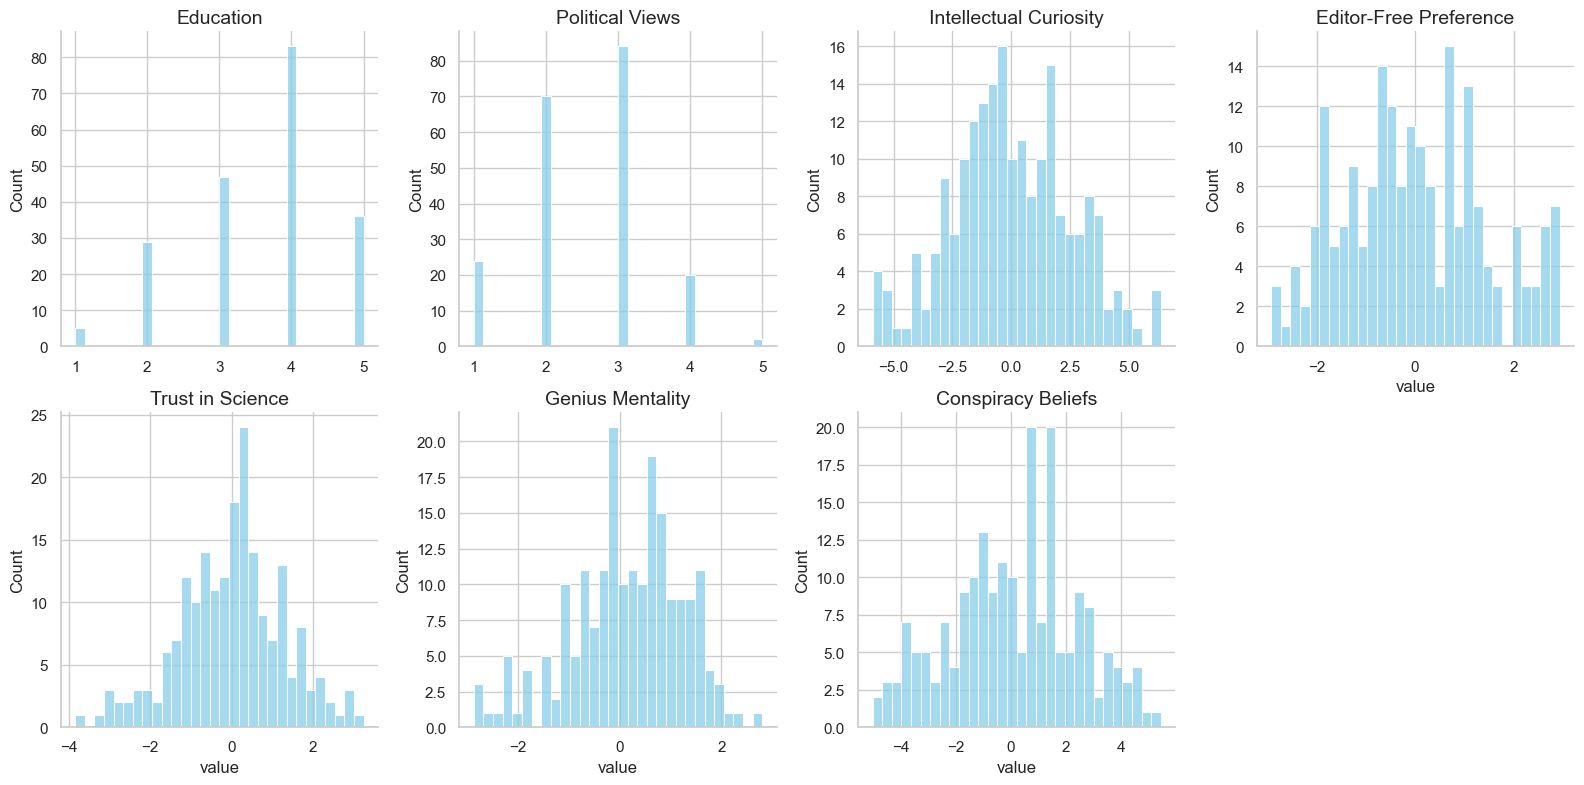

In [9]:

Final_Clean_Data = Final_Clean_Data.drop(columns=['Gen_vs_Coll_PC1'])


Final_Clean_Data = Final_Clean_Data[['Education_Numerical', 'Politics', 'Intellectual Curiosity', 
                                     'Editor-Free Preference', 'Trust in Science', 'Genius Mentality', 
                                     'Conspiracy Beliefs']]


Final_Clean_Data = Final_Clean_Data.rename(columns={
    'Politics': 'Political Views',
    'Education_Numerical': 'Education'
})

print(Final_Clean_Data.columns)






melted_data = pd.melt(Final_Clean_Data, var_name='variable', value_name='value')


sns.set(style="whitegrid")


g = sns.FacetGrid(melted_data, col_wrap=4, height=4, col="variable", sharex=False, sharey=False)
g = g.map(sns.histplot, "value",  color="skyblue", bins=30)


g.set_titles(col_template="{col_name}", size=14)


plt.show()




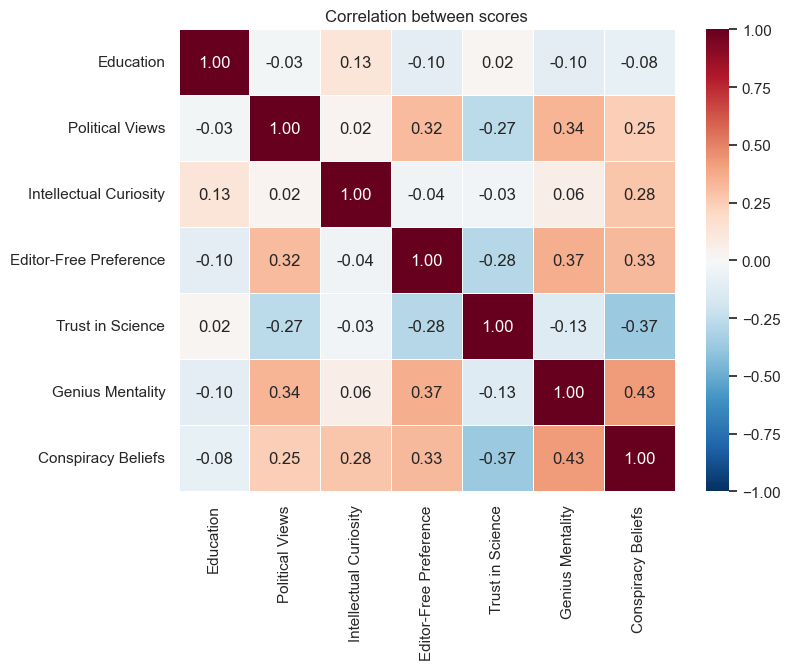

In [10]:

cor_matrix = Final_Clean_Data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(cor_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1, 
            fmt=".2f", linewidths=0.5)
plt.title("Correlation between scores")
plt.show()




# Regression

In [11]:

Y = SCORES['Conspiracy Beliefs']


X = SCORES[['Genius Mentality', 'Editor-Free Preference', 'Trust in Science', 'Education_Numerical','Intellectual Curiosity', 'Politics']]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()



X_genius = SCORES['Genius Mentality']
X_genius = sm.add_constant(X_genius)

model_genius = sm.OLS(Y, X_genius)
results_genius = model_genius.fit()



X_pop = SCORES['Editor-Free Preference']
X_pop = sm.add_constant(X_pop)

model_pop = sm.OLS(Y, X_pop)
results_pop = model_pop.fit()


X_trst = SCORES['Trust in Science']
X_trst = sm.add_constant(X_trst)

model_trst = sm.OLS(Y, X_trst)
results_trst = model_trst.fit()


X_edu = SCORES['Education_Numerical']
X_edu = sm.add_constant(X_edu)

model_edu = sm.OLS(Y, X_edu)
results_edu = model_edu.fit()





X_gen = SCORES['Politics']
X_gen = sm.add_constant(X_gen)
model_gen = sm.OLS(Y, X_gen)
results_gen = model_gen.fit()



X_for = SCORES['Intellectual Curiosity']
X_for = sm.add_constant(X_for)
model_for = sm.OLS(Y, X_for)
results_for = model_for.fit()



from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

stargazer = Stargazer([results, results_genius, results_pop, results_edu, results_trst, results_gen, results_for])
stargazer.title('Conspiracy Regression Analysis')
stargazer.custom_columns(['Multiple Regression', 'Genius Mentality', 'Editor-Free Preference','Education',  "Trust in Science",  'Political Views','Intellectual Curiosity'], [1, 1, 1,1,1,1,1])

HTML(stargazer.render_html())





In [12]:
html_string = stargazer.render_html()


with open("temp_table.html", "w") as f:
    f.write(html_string)


imgkit.from_file("temp_table.html", "regression_1.png")


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [13]:
Y = Final_Clean_Data['Genius Mentality']


X = Final_Clean_Data[[ 'Editor-Free Preference', 'Trust in Science', 'Education','Intellectual Curiosity', 'Political Views']]
X = sm.add_constant(X)

model2 = sm.OLS(Y, X)
results2 = model2.fit()





stargazer = Stargazer([results2])
stargazer.title('Genius Mentality Regression Analysis')

HTML(stargazer.render_html())

In [14]:
html_string = stargazer.render_html()


with open("temp_table.html", "w") as f:
    f.write(html_string)


imgkit.from_file("temp_table.html", "regressione gen.png")


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

Interaction with Genius Mentality



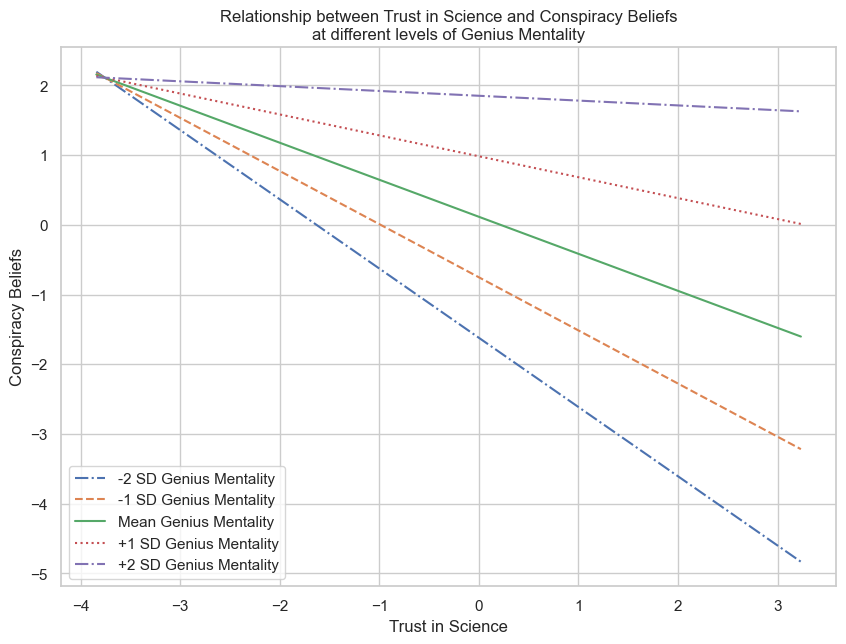


----------------------------------------------------------------------------------------------------

Interaction with Editor-Free Preference



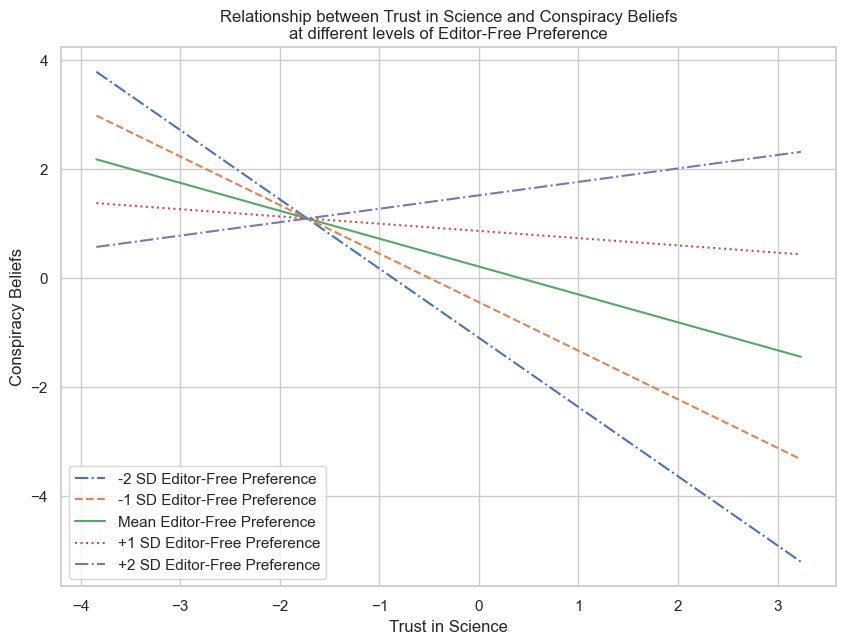


----------------------------------------------------------------------------------------------------



In [15]:



def run_interaction_analysis(dependent_var, main_effect, interaction_term, dataframe):
    df = dataframe.copy()
    df['interaction'] = df[main_effect] * df[interaction_term]
    
    X = sm.add_constant(df[[main_effect, interaction_term, 'interaction']])
    model = sm.OLS(df[dependent_var], X)
    results = model.fit()
    
    b0, b1, b2, b3 = results.params
    x_values = np.linspace(df[main_effect].min(), df[main_effect].max(), 100)
    
    mean_interact = df[interaction_term].mean()
    sd_interact = df[interaction_term].std()
    
    low_2_sd_interact = b0 + b1 * x_values + b2 * (mean_interact - 2*sd_interact) + b3 * x_values * (mean_interact - 2*sd_interact)
    low_1_sd_interact = b0 + b1 * x_values + b2 * (mean_interact - sd_interact) + b3 * x_values * (mean_interact - sd_interact)
    mean_interact_values = b0 + b1 * x_values + b2 * mean_interact + b3 * x_values * mean_interact
    high_1_sd_interact = b0 + b1 * x_values + b2 * (mean_interact + sd_interact) + b3 * x_values * (mean_interact + sd_interact)
    high_2_sd_interact = b0 + b1 * x_values + b2 * (mean_interact + 2*sd_interact) + b3 * x_values * (mean_interact + 2*sd_interact)

    # Plot
    plt.figure(figsize=(10, 7))
    plt.plot(x_values, low_2_sd_interact, label=f'-2 SD {interaction_term}', linestyle='-.')
    plt.plot(x_values, low_1_sd_interact, label=f'-1 SD {interaction_term}', linestyle='--')
    plt.plot(x_values, mean_interact_values, label=f'Mean {interaction_term}')
    plt.plot(x_values, high_1_sd_interact, label=f'+1 SD {interaction_term}', linestyle=':')
    plt.plot(x_values, high_2_sd_interact, label=f'+2 SD {interaction_term}', linestyle='-.')
    plt.title(f'Relationship between {main_effect} and {dependent_var}\nat different levels of {interaction_term}')
    plt.xlabel(main_effect)
    plt.ylabel(dependent_var)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return results



interactions = ['Genius Mentality', 'Editor-Free Preference']
results_list = []

for interaction in interactions:
    print(f"Interaction with {interaction}\n")
    result = run_interaction_analysis('Conspiracy Beliefs', 'Trust in Science', interaction, SCORES)
    results_list.append(result)
    print("\n" + "-"*100 + "\n")

stargazer = Stargazer(results_list)
html_code = stargazer.render_html()
HTML(stargazer.render_html())


In [16]:
html_string = stargazer.render_html()


with open("temp_table.html", "w") as f:
    f.write(html_string)


imgkit.from_file("temp_table.html", "interaction_3.png")


Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [17]:



html_string = stargazer.render_html()


with open("temp_table.html", "w") as f:
    f.write(html_string)


imgkit.from_file("temp_table.html", "regression_image_modi.png")



Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True


# Step-wise regression

In [18]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')




X = Final_Clean_Data.drop('Conspiracy Beliefs', axis=1)
y = Final_Clean_Data['Conspiracy Beliefs']


included = []


while True:
    changed=False
    excluded = list(set(X.columns)-set(included))
    new_pval = pd.Series(index=excluded)
    for new_column in excluded:
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
        new_pval[new_column] = model.pvalues[new_column]
    best_pval = new_pval.min()
    if best_pval < 0.05:
        best_feature = new_pval.idxmin()
        included.append(best_feature)
        changed=True
        print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

    if not changed:
        break


model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()


print(model.summary())





vif = pd.DataFrame()
vif["variables"] = X[included].columns
vif["VIF"] = [variance_inflation_factor(X[included].values, i) for i in range(X[included].shape[1])]
print(vif)


Add  Genius Mentality               with p-value 2.16313e-10
Add  Trust in Science               with p-value 4.00031e-07
Add  Intellectual Curiosity         with p-value 3.76985e-05
Add  Editor-Free Preference         with p-value 0.0325659
                            OLS Regression Results                            
Dep. Variable:     Conspiracy Beliefs   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     27.34
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           5.06e-18
Time:                        16:44:53   Log-Likelihood:                -406.27
No. Observations:                 200   AIC:                             822.5
Df Residuals:                     195   BIC:                             839.0
Df Model:                           4                                         
Covariance Type:            nonrobust          

# Clustering Analysis

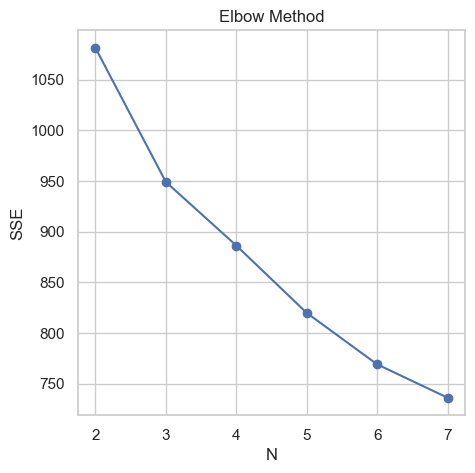

In [19]:
scaler = StandardScaler()
scores_standardized = scaler.fit_transform(Final_Clean_Data)


range_n_clusters = list(range(2,8))


sse = []

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, n_init = 'auto', random_state=0)
    

    kmeans.fit(scores_standardized)
    
 
    sse.append(kmeans.inertia_)


plt.figure(figsize=(5, 5))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('N')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [20]:
num_clusters = 4


kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)

kmeans.fit(Final_Clean_Data)




labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Cluster counts: ", cluster_counts)


df = pd.DataFrame(SCORES)  
df['Cluster'] = labels


cluster_characteristics = df.groupby('Cluster').mean()

print("Cluster characteristics: ")
print(cluster_characteristics)


Cluster counts:  {0: 56, 1: 39, 2: 51, 3: 54}
Cluster characteristics: 
         Intellectual Curiosity  Editor-Free Preference  Gen_vs_Coll_PC1  \
Cluster                                                                    
0                      0.470834               -1.194084        -0.097905   
1                     -3.031643               -0.052361         0.488768   
2                     -1.303865                0.842790        -0.142255   
3                      2.907560                0.423919        -0.582579   

         Genius Mentality  Conspiracy Beliefs  Trust in Science  Politics  \
Cluster                                                                     
0               -0.418579           -1.540691          0.326084  2.214286   
1               -0.153489           -2.202837          0.643800  2.384615   
2                0.516226            1.810913         -0.720270  2.784314   
3                0.508788            1.820210         -0.219112  2.722222   

        

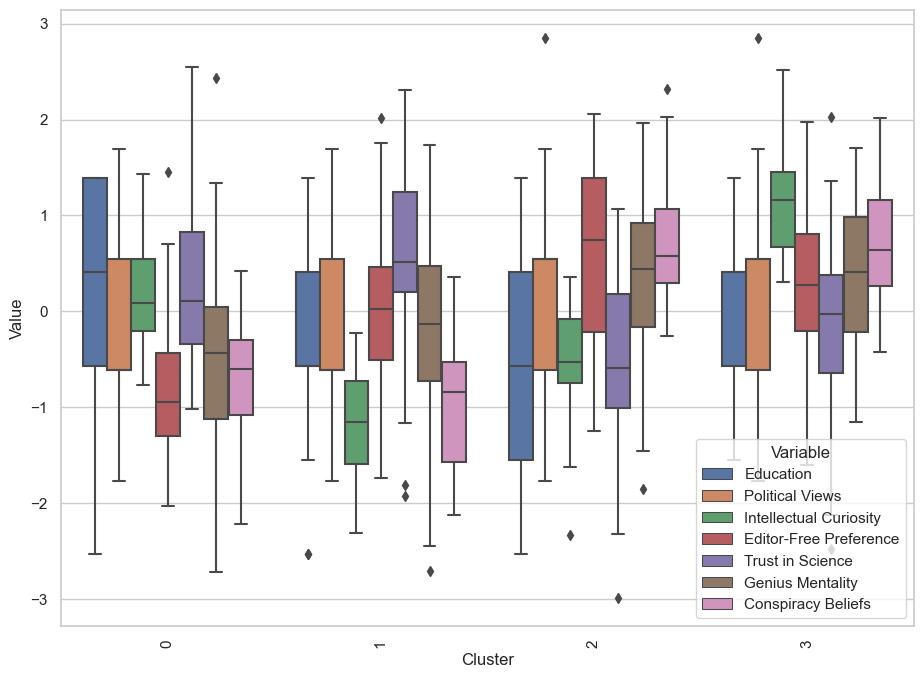

In [21]:

scaler = StandardScaler()
scores_standardized = pd.DataFrame(scaler.fit_transform(Final_Clean_Data), columns=Final_Clean_Data.columns)


scores_standardized['Cluster'] = kmeans.labels_


melted_scores = pd.melt(scores_standardized, id_vars='Cluster', var_name='Variable', value_name='Value')


melted_scores = melted_scores[melted_scores['Variable'] != 'Politics']


plt.figure(figsize=(11, 8))
sns.boxplot(x='Cluster', y='Value', hue='Variable', data=melted_scores)
plt.xticks(rotation=90)  

plt.show()


# Mediation and Moderation analysis

I ran a model with Conspiracy belief as dependent variable; Trust in Science as Independent variable; Genius Mentality as mediator; and Informality as moderator. 

Despite finding clear effects, no combination of levels of genius and informality resulted in a positive interaction between Trust and Conspiracy. Only the highest level (max informality and max genius) had a positive effect but the magnitude was negligible and the result not significant.

In [22]:
import pandas as pd
from pyprocessmacro import Process
import statsmodels.api as sm


Y = 'Conspiracy Beliefs'
X = 'Trust in Science'
M = 'Genius Mentality'
W = 'Editor-Free Preference'
M2 = 'Education_Numerical'






modello = Process(data=SCORES, model=14, y=Y, x=X, m=[W], v=M, 
                  modval={W:[-2,-1, 0, 1.2 ,2, 2.7], M:[-2.4,-1, 0, 0.7,1.7, 2.2] 
            }, suppr_init=True)



print("Model : Moderated Mediation Editor-Free moderated by Genius")
modello.summary()
print("\n\n")








Model : Moderated Mediation Editor-Free moderated by Genius

***************************** OUTCOME MODELS ****************************

Outcome = Conspiracy Beliefs 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  p-value
 0.3231   0.3056 3.6885 23.2656    4  195   0.0000

Coefficients

                                          coeff     se       t      p    LLCI    ULCI
Cons                                     0.1476 0.1475  1.0007 0.3182 -0.1415  0.4368
Trust in Science                        -0.5157 0.1109 -4.6512 0.0000 -0.7330 -0.2984
Genius Mentality                         0.6697 0.1348  4.9699 0.0000  0.4056  0.9338
Editor-Free Preference                   0.2702 0.1098  2.4612 0.0147  0.0550  0.4853
Editor-Free Preference*Genius Mentality -0.2560 0.0905 -2.8273 0.0052 -0.4334 -0.0785

-------------------------------------------------------------------------

Outcome = Editor-Free Preference 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1  df2  

/Users/user/anaconda3/lib/python3.10/site-packages/pyprocessmacro/utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
/Users/user/anaconda3/lib/python3.10/site-packages/pyprocessmacro/utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")
/Users/user/anaconda3/lib/python3.10/site-packages/pyprocessmacro/utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.

/Users/user/anaconda3/lib/python3.10/site-packages/pyprocessmacro/utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
/Users/user/anaconda3/lib/python3.10/site-packages/pyprocessmacro/utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


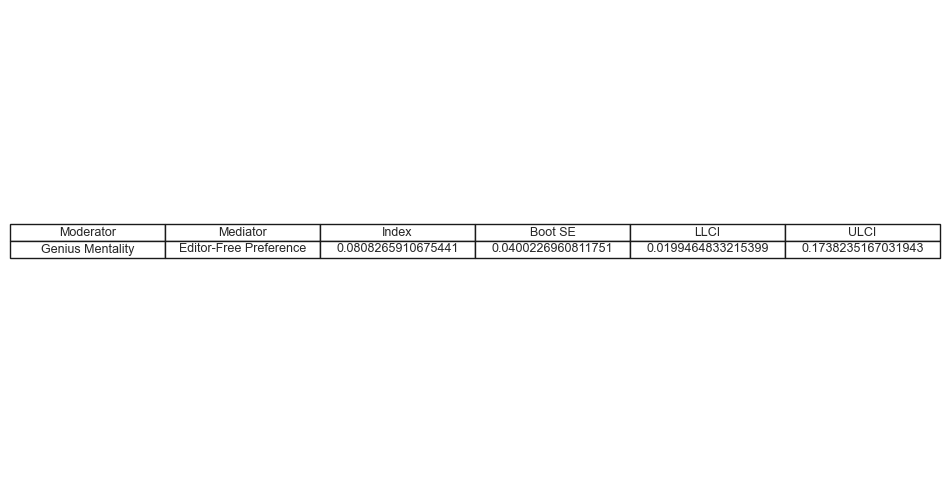

In [23]:
g = modello.indirect_model
index_summary = g.MM_index_summary()


df_index_summary = pd.DataFrame(index_summary)


fig, ax = plt.subplots(figsize=(12, 6))


ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_index_summary.values, colLabels=df_index_summary.columns, cellLoc='center', loc='center')


plt.savefig('mm_index_summary.png', dpi=300, bbox_inches='tight')
plt.show()

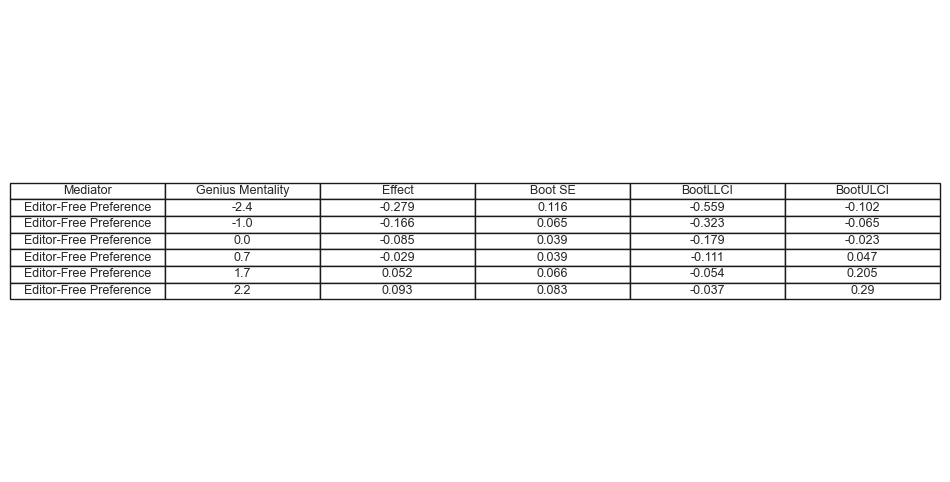

In [24]:


indirect_model = modello.indirect_model
df_indirect = indirect_model.coeff_summary()

df_indirect = df_indirect.round(3)


fig, ax = plt.subplots(figsize=(12, 6))

ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_indirect.values, colLabels=df_indirect.columns, cellLoc='center', loc='center')

plt.savefig('indirect_effects_table.png', dpi=300, bbox_inches='tight')
plt.show()